In [430]:
from keras.layers import Dense
#Dense(units, # Number of output neurons
#activation=None, # Activation function by name
#use_bias=True, # Use bias term or not
#kernel_initializer='glorot_uniform',
#bias_initializer='zeros')
from keras.layers import Dropout
#Dropout(rate, # Fraction of units to drop
#seed=None) # Random seed for reproducibility
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import Callback
import pickle
batch_size = 128
num_classes = 10
epochs = 20
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [431]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [13]:
model = Sequential()
model.add(Dense(512, activation='relu',
          input_shape=(784,))) # First layer only
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='sigmoid'))


In [371]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_46 (Dense)             (None, 100)               211300    
_________________________________________________________________
dropout_31 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_47 (Dense)             (None, 100)               10100     
_________________________________________________________________
dropout_32 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_48 (Dense)             (None, 10)                1010      
Total params: 222,410
Trainable params: 222,410
Non-trainable params: 0
_________________________________________________________________


In [14]:
#model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [15]:
model.fit(x_train, y_train, batch_size=batch_size,
          epochs=epochs, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 115us/step - loss: 1.7251 - acc: 0.5558 - val_loss: 0.7761 - val_acc: 0.8398
Epoch 2/20
60000/60000 [==============================] - 7s 116us/step - loss: 0.6750 - acc: 0.8102 - val_loss: 0.4232 - val_acc: 0.8893
Epoch 3/20
60000/60000 [==============================] - 7s 111us/step - loss: 0.4884 - acc: 0.8579 - val_loss: 0.3465 - val_acc: 0.9036
Epoch 4/20
60000/60000 [==============================] - 7s 113us/step - loss: 0.4206 - acc: 0.8779 - val_loss: 0.3124 - val_acc: 0.9123
Epoch 5/20
60000/60000 [==============================] - 7s 112us/step - loss: 0.3792 - acc: 0.8888 - val_loss: 0.2859 - val_acc: 0.9192
Epoch 6/20
60000/60000 [==============================] - 7s 110us/step - loss: 0.3511 - acc: 0.8979 - val_loss: 0.2685 - val_acc: 0.9242
Epoch 7/20
60000/60000 [==============================] - 7s 111us/step - loss: 0.3265 - acc: 0.9061 - val_loss: 0.2540 - 

In [16]:
!wget http://ufldl.stanford.edu/housenumbers/train.tar.gz

--2019-01-07 14:42:06--  http://ufldl.stanford.edu/housenumbers/train.tar.gz
Resolving ufldl.stanford.edu (ufldl.stanford.edu)... 171.64.68.10
Connecting to ufldl.stanford.edu (ufldl.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 404141560 (385M) [application/x-gzip]
Saving to: ‘train.tar.gz’

100%[======================================>] 404,141,560 11.3MB/s   in 37s    

2019-01-07 14:42:43 (10.5 MB/s) - ‘train.tar.gz’ saved [404141560/404141560]



# Loading Data

In [17]:
!wget http://ufldl.stanford.edu/housenumbers/test_32x32.mat

--2019-01-07 14:43:10--  http://ufldl.stanford.edu/housenumbers/test_32x32.mat
Resolving ufldl.stanford.edu (ufldl.stanford.edu)... 171.64.68.10
Connecting to ufldl.stanford.edu (ufldl.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64275384 (61M) [text/plain]
Saving to: ‘test_32x32.mat’

100%[======================================>] 64,275,384  9.96MB/s   in 6.2s   

2019-01-07 14:43:17 (9.84 MB/s) - ‘test_32x32.mat’ saved [64275384/64275384]



In [47]:
!wget http://ufldl.stanford.edu/housenumbers/train_32x32.mat

--2019-01-08 08:09:21--  http://ufldl.stanford.edu/housenumbers/train_32x32.mat
Resolving ufldl.stanford.edu (ufldl.stanford.edu)... 171.64.68.10
Connecting to ufldl.stanford.edu (ufldl.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 182040794 (174M) [text/plain]
Saving to: ‘train_32x32.mat.1’

100%[======================================>] 182,040,794 13.5MB/s   in 15s    

2019-01-08 08:09:36 (11.7 MB/s) - ‘train_32x32.mat.1’ saved [182040794/182040794]



In [432]:
#train_data = open('train_32x32.mat')
import scipy.io as sio
train_data = sio.loadmat('train_32x32.mat')
print (len(train_data))

5


(32, 32, 3, 73257)
(73257, 1)


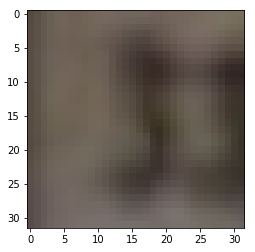

[3]


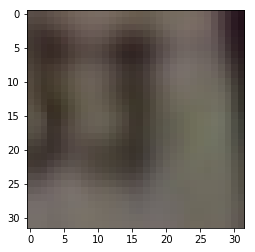

[3]


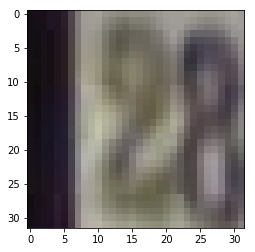

[2]


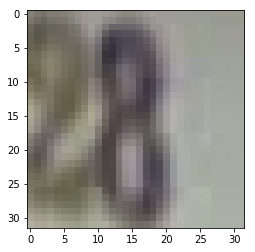

[8]


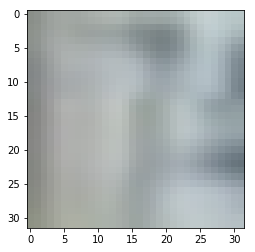

[7]


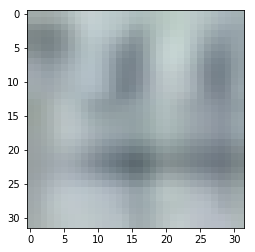

[4]


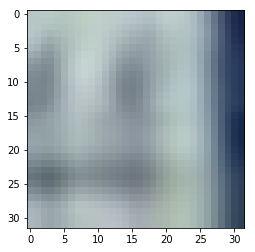

[4]


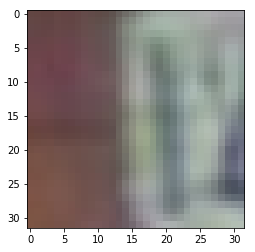

[1]


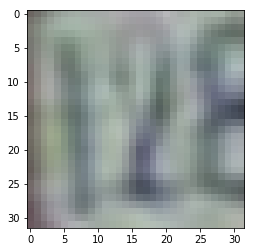

[2]


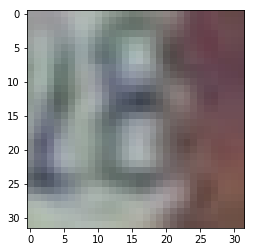

[8]


In [433]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
%matplotlib inline

image_ind = 10
train_data = sio.loadmat('train_32x32.mat')
test_data = sio.loadmat('test_32x32.mat')

# access to the dict
x_train = train_data['X']
y_train = train_data['y']
x_test = test_data['X']
y_test = test_data['y']

# show sample
print (x_train.shape)
print (y_train.shape)

for i in range(10, 20):
    plt.imshow(x_train[:,:,:,i])
    plt.show()
    print (y_train[i])

## Data Exploration

In [64]:
np.save('x_train.npy', x_train)

In [65]:
d = np.load('x_train.npy')
d.shape

(32, 32, 3, 73257)

# Data Exploration

In [434]:
class LossHistory(Callback):
    def on_train_begin(self, logs={}):
        self.losses = []

    def on_batch_end(self, batch, logs={}):
        sys.stdout.write(str(logs.get('loss'))+str(', '))
        sys.stdout.flush()
        self.losses.append(logs.get('loss'))
        
lr = LossHistory()

In [435]:
def valueDistribution(values):
    return np.unique(values, return_counts=True)

In [436]:
def printFrequencyDistribution(y_train_values, y_test_values,number_labels):
    test_value_distribution = valueDistribution(y_test_values)
    train_value_distribution = valueDistribution(y_train_values)
    #test_value_distribution = np.unique(y_test_values, return_counts=True)
    #train_value_distribution = np.unique(y_train_values, return_counts=True)
    ind = np.arange(Number_labels) 

    plt.bar(ind, train_value_distribution[1], align='center', color='blue', label='Training Labels')
    plt.bar(ind, test_value_distribution[1], align='center', color='red', label='Testing Labels')
    plt.legend()
    plt.xlabel('Class Labels')
    plt.ylabel('Number of Label Occurences')
    plt.title('Frequency Distribution of Class Labels')
    plt.show()
    plt.show()
    print (train_value_distribution)

 

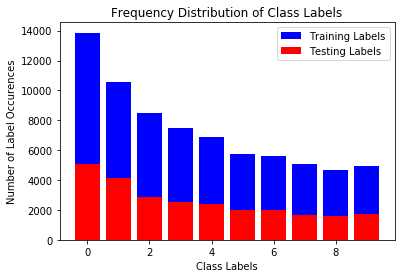

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=uint8), array([13861, 10585,  8497,  7458,  6882,  5727,  5595,  5045,  4659,  4948]))
4659


In [437]:

printFrequencyDistribution(y_train, y_test,num_classes)     
    

train_min = np.min(train_value_distribution[1])
print (train_min)

In [438]:
def valueSelection(x_values,y_values,cut):
    selector = np.ones((len(y_values)), dtype=bool)
    selector[0:10]
    for ind in range(10):
        sel =y_values[:,0]==ind
        sel[np.argwhere(sel)[:cut]]=0
        selector[sel] = 0
    y_selection=y_values[selector]
    x_selection=x_values[:,:,:,selector]
    return (x_selection,y_selection)

(32, 22, 3, 46590)


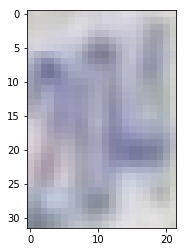

[0]


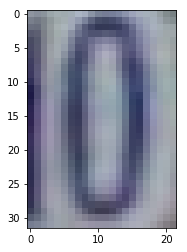

[0]


In [439]:
#x_train_cut= x_train_small[:,5:27,:,]
#x_test_cut= x_test_small[:,5:27,:,]
print (x_train_small.shape)
plt.imshow(x_train_small[:,:,:,93])
plt.show()
print (y_train_small[93])
plt.imshow(x_train_small[:,:,:,96])
plt.show()
print (y_train_small[96])

In [440]:
print (x_train_small.shape)
print (x_test_small.shape)
#print (x_train_cut[:,:,:,10])
number_train=len(y_train_small)
number_test=len(y_test_small)
print(number_train)
print(number_test)


(32, 22, 3, 46590)
(32, 22, 3, 15950)
46590
15950


In [441]:

train_min = np.min(valueDistribution(y_train)[1])
test_min = np.min(valueDistribution(y_test)[1])
print (train_min)
print (x_train_small.shape)
print (y_train_small.shape)
#x_train_small,y_train_small=valueSelection(x_train_cut,y_train,train_min)
#x_test_small,y_test_small=valueSelection(x_test_cut,y_test,test_min)


4659
(32, 22, 3, 46590)
(46590, 1)


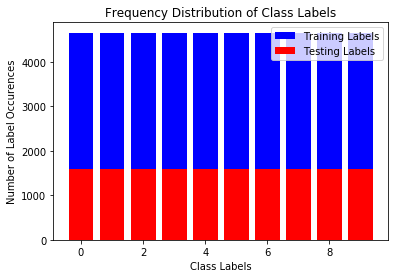

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([4659, 4659, 4659, 4659, 4659, 4659, 4659, 4659, 4659, 4659]))


In [442]:
printFrequencyDistribution(y_train_small,y_test_small,num_classes) 

In [443]:
print (x_train_small.shape)
print (x_test_small.shape)

(32, 22, 3, 46590)
(32, 22, 3, 15950)


# Data Preprocessing

(32, 22, 3, 46590)


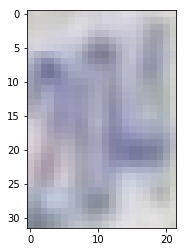

[0]


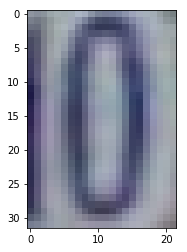

[0]


In [444]:
#x_train_cut= x_train_small[:,5:27,:,]
#x_test_cut= x_test_small[:,5:27,:,]
print (x_train_small.shape)
plt.imshow(x_train_small[:,:,:,93])
plt.show()
print (y_train_small[93])
plt.imshow(x_train_small[:,:,:,96])
plt.show()
print (y_train_small[96])

In [445]:
print (x_train_small.shape)
print (x_test_small.shape)
#print (x_train_cut[:,:,:,10])
number_train=len(y_train_small)
number_test=len(y_test_small)
print(number_train)
print(number_test)


(32, 22, 3, 46590)
(32, 22, 3, 15950)
46590
15950


In [446]:
x_train_three_dim = x_train_small.reshape(704,3,number_train)
x_test_three_dim = x_test_small.reshape(704, 3, number_test)
x_train_data = x_train_three_dim.astype('float32')
x_test_data = x_test_three_dim.astype('float32')
x_train_data /= 256
x_test_data /= 256
#changing class labels range 1-10 to 0-9
y_train_small[y_train_small == 10] = 0
y_test_small[y_test_small == 10] = 0

#y_train_onehot = to_categorical(y_train, 10)
#y_test_onehot = to_categorical(y_test, 10)

print ('Train data:', x_train_data.shape,', Train labels:', y_train_small.shape)
print ('Test data:', x_test_data.shape,', Test labels:', y_test_small.shape)

Train data: (704, 3, 46590) , Train labels: (46590, 1)
Test data: (704, 3, 15950) , Test labels: (15950, 1)


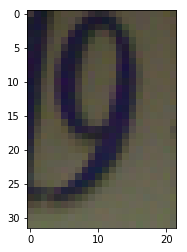

[9]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]


In [447]:
y_train_onehot = to_categorical(y_train_small, num_classes)
y_test_onehot = to_categorical(y_test_small,  num_classes)
plt.imshow(x_train_small[:,:,:,1])
plt.show()
print (y_train[1])
print (y_train_onehot[1])

In [448]:
model = Sequential()
model.add(Dense(100, activation='relu',
          input_shape=(704*3,))) # First layer only
model.add(Dropout(0.1))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(num_classes, activation='sigmoid'))


In [449]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_49 (Dense)             (None, 100)               211300    
_________________________________________________________________
dropout_33 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_50 (Dense)             (None, 100)               10100     
_________________________________________________________________
dropout_34 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_51 (Dense)             (None, 10)                1010      
Total params: 222,410
Trainable params: 222,410
Non-trainable params: 0
_________________________________________________________________


In [385]:
x_train_data.shape

(704, 3, 46590)

In [450]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [374]:
epochs=1
batch_size=88
result= model.fit(x_train_data.reshape((704*3,-1)).T, y_train_onehot, batch_size=batch_size,
          epochs=epochs, validation_data=(x_test_data.reshape((704*3,-1)).T, y_test_onehot))
#score = model.evaluate(x_test_data, y_test_data, verbose=0)
#print('Test loss:', score[0])
#print('Test accuracy:', score[1])

Train on 46590 samples, validate on 15950 samples
Epoch 1/1
46590/46590 [==============================] - 5s 103us/step - loss: 0.3762 - acc: 0.8767 - val_loss: 0.6665 - val_acc: 0.8115


In [321]:
print (result)

In [487]:
score = model.evaluate(x_test_data.reshape((704*3,-1)).T, y_test_onehot, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.663898684504
Test accuracy: 0.799247648903


In [ ]:
for i in range(6, 14):
    plt.imshow(x_test_data[:,:,:,i])
    plt.show()

In [278]:
np.set_printoptions(linewidth=180)

(15950, 2112)
Correct Values: [5 2 1 0 6 1 9 1 1 8 3 6 5 1 4 4 1 6 3 4 2 0 1 3 2 5 4 1 4 2]
Prediction:     [5 2 1 0 6 1 9 1 1 8 9 6 5 1 4 4 1 6 3 4 2 0 1 9 2 5 8 1 4 2]
[[  6.76326181e-07   6.81376333e-09   9.40734637e-08   5.76293246e-07   5.47122561e-08   5.08495650e-05   8.34374805e-06   3.43321005e-07   5.18218712e-07   4.33638161e-06]
 [  5.20304468e-07   3.34954677e-07   1.16548722e-03   7.03999331e-06   2.57707057e-07   2.47496956e-07   5.88456537e-08   9.58911869e-07   3.65113215e-06   1.54467227e-06]
 [  1.09530379e-06   9.01704789e-06   2.31071681e-07   1.00611430e-08   2.94969340e-07   3.07767323e-08   1.10230211e-07   1.01863478e-07   5.10081350e-07   1.04555930e-07]
 [  3.51549934e-05   1.18693407e-07   2.99191197e-06   1.40926013e-05   1.58254764e-07   3.02126409e-06   1.80003517e-05   6.54656333e-07   2.21912273e-06   3.44443652e-06]
 [  8.57790699e-04   2.19598805e-04   1.69500112e-04   2.16817803e-04   4.91898536e-05   1.84729768e-04   9.58272349e-03   7.38305331e-04 

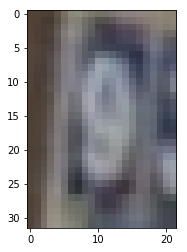

[9]


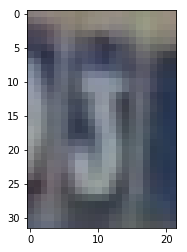

[3]


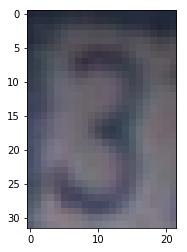

[3]


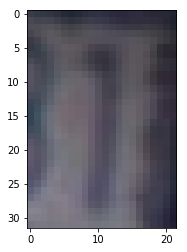

[1]


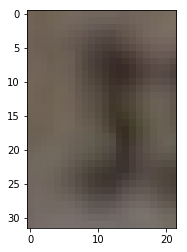

[3]


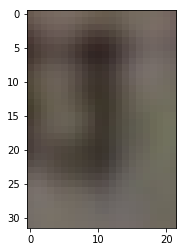

[3]


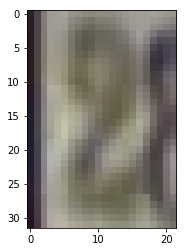

[2]


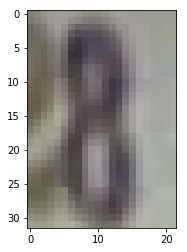

[8]


In [488]:
# new instances where we do not know the answer
#Xnew, _ = make_blobs(n_samples=3, centers=2, n_features=2, random_state=1)
#Xnew = scalar.transform(Xnew)
# make a prediction
Xnew = x_test_data.reshape((704*3,-1)).T
print (Xnew.shape)
#ynew = model.predict_classes(Xnew[1])
# show the inputs and predicted outputs
#out2 = model.predict(Xnew)  
#print(np.argmax(out2))
out2 = model.predict(Xnew[0:30])
y =y_test_small.reshape([-1])
print ('Correct Values:',y[0:30])
print ('Prediction:    ',np.argmax(out2, axis=1))
print (out2[:15])

for i in range(6, 14):
    plt.imshow(x_train_small[:,:,:,i])
    plt.show()
    print (y_train_small[i])
#print("X=%s, Predicted=%s" % (Xnew[1], ynew[1]))

In [355]:
import copy 
modelbackup = copy.deepcopy(model)

In [356]:
pickle.dump(modelbackup, open('modelv8.pck','wb'))
#pickle.dump(modelbackup, open('model.pck','wb'),protocol=-1)

In [452]:
model = pickle.load( open( "modelv8.pck", "rb" ) )

AttributeError: 'LossHistory' object has no attribute 'losses'

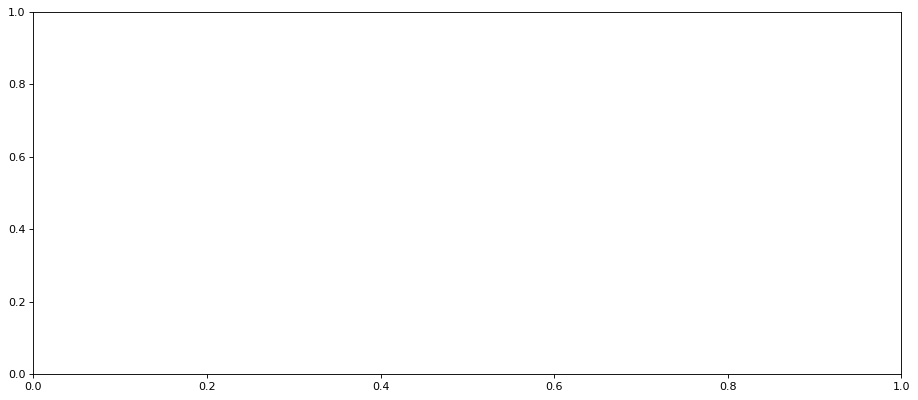

In [454]:


fig, ax = plt.subplots(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
size = len(lr.losses)
#ax.plot(range(0,size), lr.losses, '-', color='blue', animated = True, linewidth=1)



In [407]:
!wget https://koch-uebersetzungen.de/data/Data.tar

--2019-01-09 16:00:56--  https://koch-uebersetzungen.de/data/Data.tar
Resolving koch-uebersetzungen.de (koch-uebersetzungen.de)... 213.133.104.46
Connecting to koch-uebersetzungen.de (koch-uebersetzungen.de)|213.133.104.46|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 193024 (188K) [application/x-tar]
Saving to: ‘Data.tar’

100%[======================================>] 193,024      505KB/s   in 0.4s   

2019-01-09 16:00:57 (505 KB/s) - ‘Data.tar’ saved [193024/193024]



In [409]:
!mkdir numbers

mkdir: cannot create directory ‘numbers’: File exists


In [418]:
!mv *.png numbers


In [420]:
!del numbers/Data.tar

/bin/sh: del: command not found


In [515]:
from PIL import Image
import glob
import os
path = 'numbers'

x_images_list=[]
y_images_list=[]
# adjust width and height to your needs
width = 22
height = 32

for filename in glob.glob(os.path.join(path, '*.png')):
    imageFile = filename
    im1 = Image.open(imageFile)
    im2 = im1.resize((width, height), Image.BILINEAR)
    im3 = np.asarray(im2)
    x_images_list.append(im3)
    y_images_list.append(int(filename[8]))
x_images = np.array(x_images_list)
y_images = np.array(y_images_list)
x_images = np.transpose(x_images, (1,2,3, 0))

In [513]:
print (y_images)
print (x_images.shape)
print (x_images[:,:,0,0])

[9 0 1 6 0 5 0 1]
(32, 22, 3, 8)
[[177 174 133  75  43  30  23  22  17   8   6   3   3   4   7  15  25  31  40  54  77 117]
 [175 178 140  84  54  40  33  25  20  13   7   6  12  13  18  23  35  41  44  52  75 115]
 [169 173 143  93  62  52  43  41  34  27  21  21  29  28  32  36  48  53  54  53  70 113]
 [164 167 149 102  67  62  56  50  45  45  47  42  39  40  41  47  58  62  59  51  62 106]
 [163 163 150 107  72  67  61  52  52  56  64  59  50  53  51  49  61  70  63  51  61 109]
 [164 163 138  97  73  63  60  57  63  70  75  67  65  69  67  59  58  61  59  49  58 115]
 [163 164 134  95  73  67  65  69  73  69  71  63  63  68  68  65  64  60  64  47  55 113]
 [162 163 136  96  68  63  70  80  78  63  53  46  49  55  61  67  64  61  72  54  57 109]
 [163 167 137  89  61  62  75  78  73  44  31  30  29  29  38  59  62  62  64  55  63 108]
 [164 169 137  85  56  61  78  83  60  22  11   7   7  14  24  51  68  65  57  51  68 111]
 [167 169 139  83  51  63  87  84  52  13   4   3   3   6

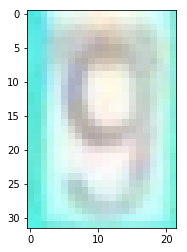

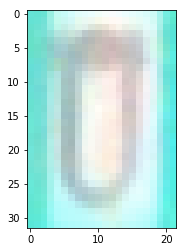

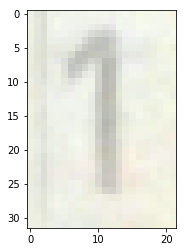

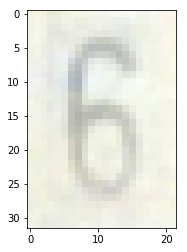

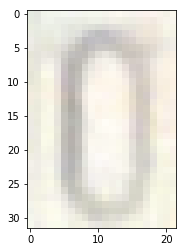

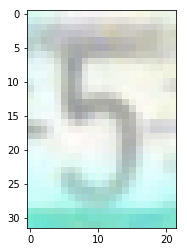

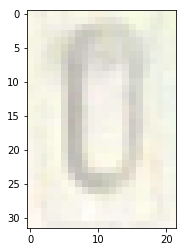

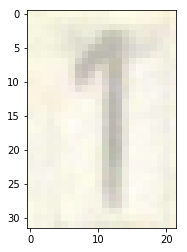

In [519]:
for ind in range(8):
    plt.imshow(x_images[:,:,:,ind])
    plt.show()

In [517]:
x_images = x_images.astype('float32')
x_images_three_dim= x_images.reshape(704,3,-1)
x_images2 = x_images_three_dim.astype('float32')

x_images2 /= 256
x_images2 = 1-x_images2
print (x_images2.shape)
print (x_images_three_dim.shape)
Xnew =x_images2.reshape((704*3,-1)).T
print (Xnew.shape)


out2 = model.predict(Xnew[0:8])
y =y_images.reshape([-1])
print ('Correct Values:',y_images)
print ('Prediction:    ',np.argmax(out2, axis=1))
print (out2[:])



(704, 3, 8)
(704, 3, 8)
(8, 2112)
Correct Values: [9 0 1 6 0 5 0 1]
Prediction:     [9 0 1 6 0 5 0 1]
[[  5.91602003e-08   8.01290534e-10   3.41981128e-08   5.47366471e-06   1.01428235e-07   7.45874422e-06   3.03039158e-08   1.01471676e-09   3.81610516e-06   6.49696594e-05]
 [  4.98923531e-04   1.03538866e-07   2.61350522e-07   1.48382480e-06   1.00287822e-08   9.75182616e-07   1.04726337e-06   1.22866743e-06   1.21660651e-06   1.24964311e-06]
 [  3.68476162e-06   6.80617290e-04   1.05189038e-05   2.40500758e-05   1.89918512e-06   1.90570051e-06   5.96519499e-07   2.46111667e-05   1.82820149e-05   8.01794795e-06]
 [  1.15470712e-05   8.70621690e-08   2.12114898e-07   5.09284064e-06   1.11569349e-07   1.17094853e-04   1.21475598e-02   4.43737264e-07   2.03120566e-04   1.74874094e-06]
 [  4.93874885e-02   3.17219492e-05   4.60574483e-07   1.30943226e-06   9.12786254e-06   2.81323219e-06   1.80151110e-04   2.64838854e-06   3.23576169e-05   6.03232775e-06]
 [  1.49953817e-11   4.91375441e-

In [417]:
!ls -l


total 5944872
-rwx------.  1 s44c-ceeec93c5445c9-d36004008aa3 users     18768 Jan  8 14:11 0-001.png
-rwx------.  1 s44c-ceeec93c5445c9-d36004008aa3 users     23613 Jan  8 14:11 0-002.png
-rwx------.  1 s44c-ceeec93c5445c9-d36004008aa3 users     22849 Jan  8 14:12 0-003.png
-rwx------.  1 s44c-ceeec93c5445c9-d36004008aa3 users     24949 Jan  8 14:09 1-001.png
-rwx------.  1 s44c-ceeec93c5445c9-d36004008aa3 users     23143 Jan  8 14:10 1-002.png
-rwx------.  1 s44c-ceeec93c5445c9-d36004008aa3 users     23617 Jan  8 14:12 5-001.png
-rwx------.  1 s44c-ceeec93c5445c9-d36004008aa3 users     28356 Jan  8 14:10 6-001.png
-rwx------.  1 s44c-ceeec93c5445c9-d36004008aa3 users     20289 Jan  8 14:12 9-001.png
drwx------.  2 s44c-ceeec93c5445c9-d36004008aa3 users      4096 Dec 26 12:23 a2_m1.json
-rw-------.  1 s44c-ceeec93c5445c9-d36004008aa3 users     48683 Dec 26 12:24 a2_m1.json.zip
-rw-------.  1 s44c-ceeec93c5445c9-d36004008aa3 users     65767 Dec 26 12:24 a2_m1.json.zip.base64
drwx------.